In [1]:
import pyfiles.HFSAnalyzer as HFSA
import matplotlib.pyplot as plt
from imp import reload
import seaborn as sns
import pandas as pd
import numpy as np
import math
import time
import matplotlib.gridspec as gridspec

sns.set_context('talk')
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_palette('colorblind')
%matplotlib inline

In [2]:
# load and scrub data
workdir = '/home/evan/git/HF-Stability/analysis/'
df =  HFSA.json_dir_to_df(workdir + 'log')

df.dropna(axis='rows', subset=['NDIM', 'rs', 'Nk', 'mycase', 'dav_min_eval'], inplace=True)
df['Nk'] = df['Nk'].astype(int)
df['NDIM'] = df['NDIM'].astype(int)
df['mycase'] = df['mycase'].astype(str)

In [3]:
# Split into groups
def dict_subview(dic, keys):
    return {key : val for (key, val) in dic.items() if key in keys}

data = {
     'all'   : df
    ,'3D'    : df[df['NDIM'] == 3]
    ,'2D'    : df[df['NDIM'] == 2]
    ,'3Drs12': df[np.isclose(df['rs'].as_matrix(), 1.2) & (df['NDIM'] == 3)]
    ,'2Drs12': df[np.isclose(df['rs'].as_matrix(), 1.2) & (df['NDIM'] == 2)]
    ,'3DR2U' : df[((df.mycase.str.contains('cRHF2cUHF')) & (df['NDIM'] == 3))]
    ,'3DR2G' : df[((df.mycase.str.contains('cRHF2cGHF')) & (df['NDIM'] == 3))]
    ,'3DU2U' : df[((df.mycase.str.contains('cUHF2cUHF')) & (df['NDIM'] == 3))]

    ,'2DR2U' : df[((df.mycase.str.contains('cRHF2cUHF')) & (df['NDIM'] == 2))]
    ,'2DR2G' : df[((df.mycase.str.contains('cRHF2cGHF')) & (df['NDIM'] == 2))]
    ,'2DU2U' : df[((df.mycase.str.contains('cUHF2cUHF')) & (df['NDIM'] == 2))]
}

# remove emptys
data = {key: val for (key, val) in data.items() if len(val) > 0}

In [4]:
# Matplotlib defaults
plt.rcParams['savefig.transparent'] = True
plt.rcParams['savefig.format'] = 'eps'

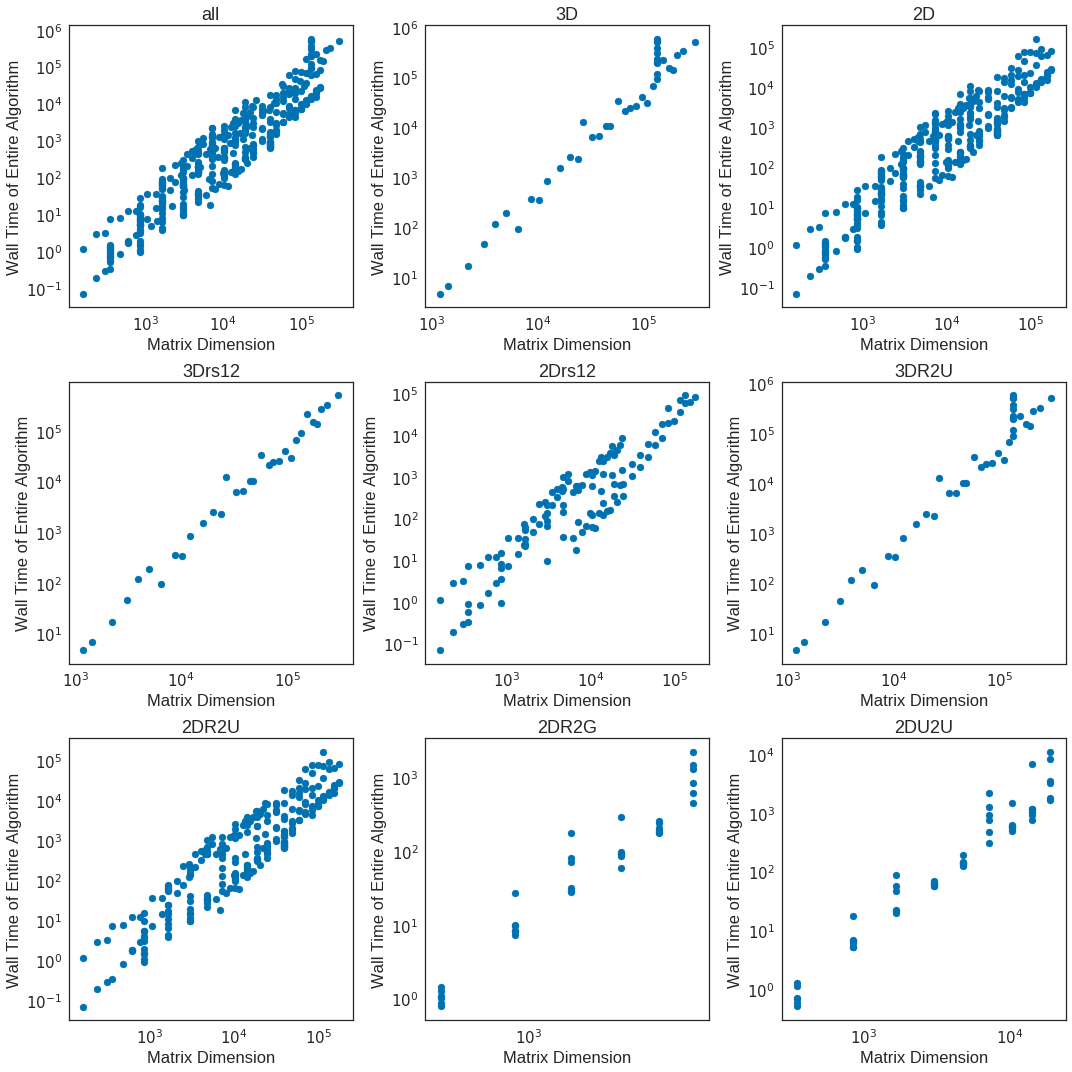

In [5]:
fig = plt.figure(figsize=(15, 15))
HFSA.subplotByDfDict(data, fig, HFSA.plot_runtime)
plt.tight_layout()
plt.show()

/home/evan/git/HF-Stability/analysis/pyfiles/HFSAnalyzer.py:423: RuntimeWarning: divide by zero encountered in log10
  c = np.polyfit(np.log10(Nmatfull)[-10:], np.log10(fulltimes)[-10:], 1)


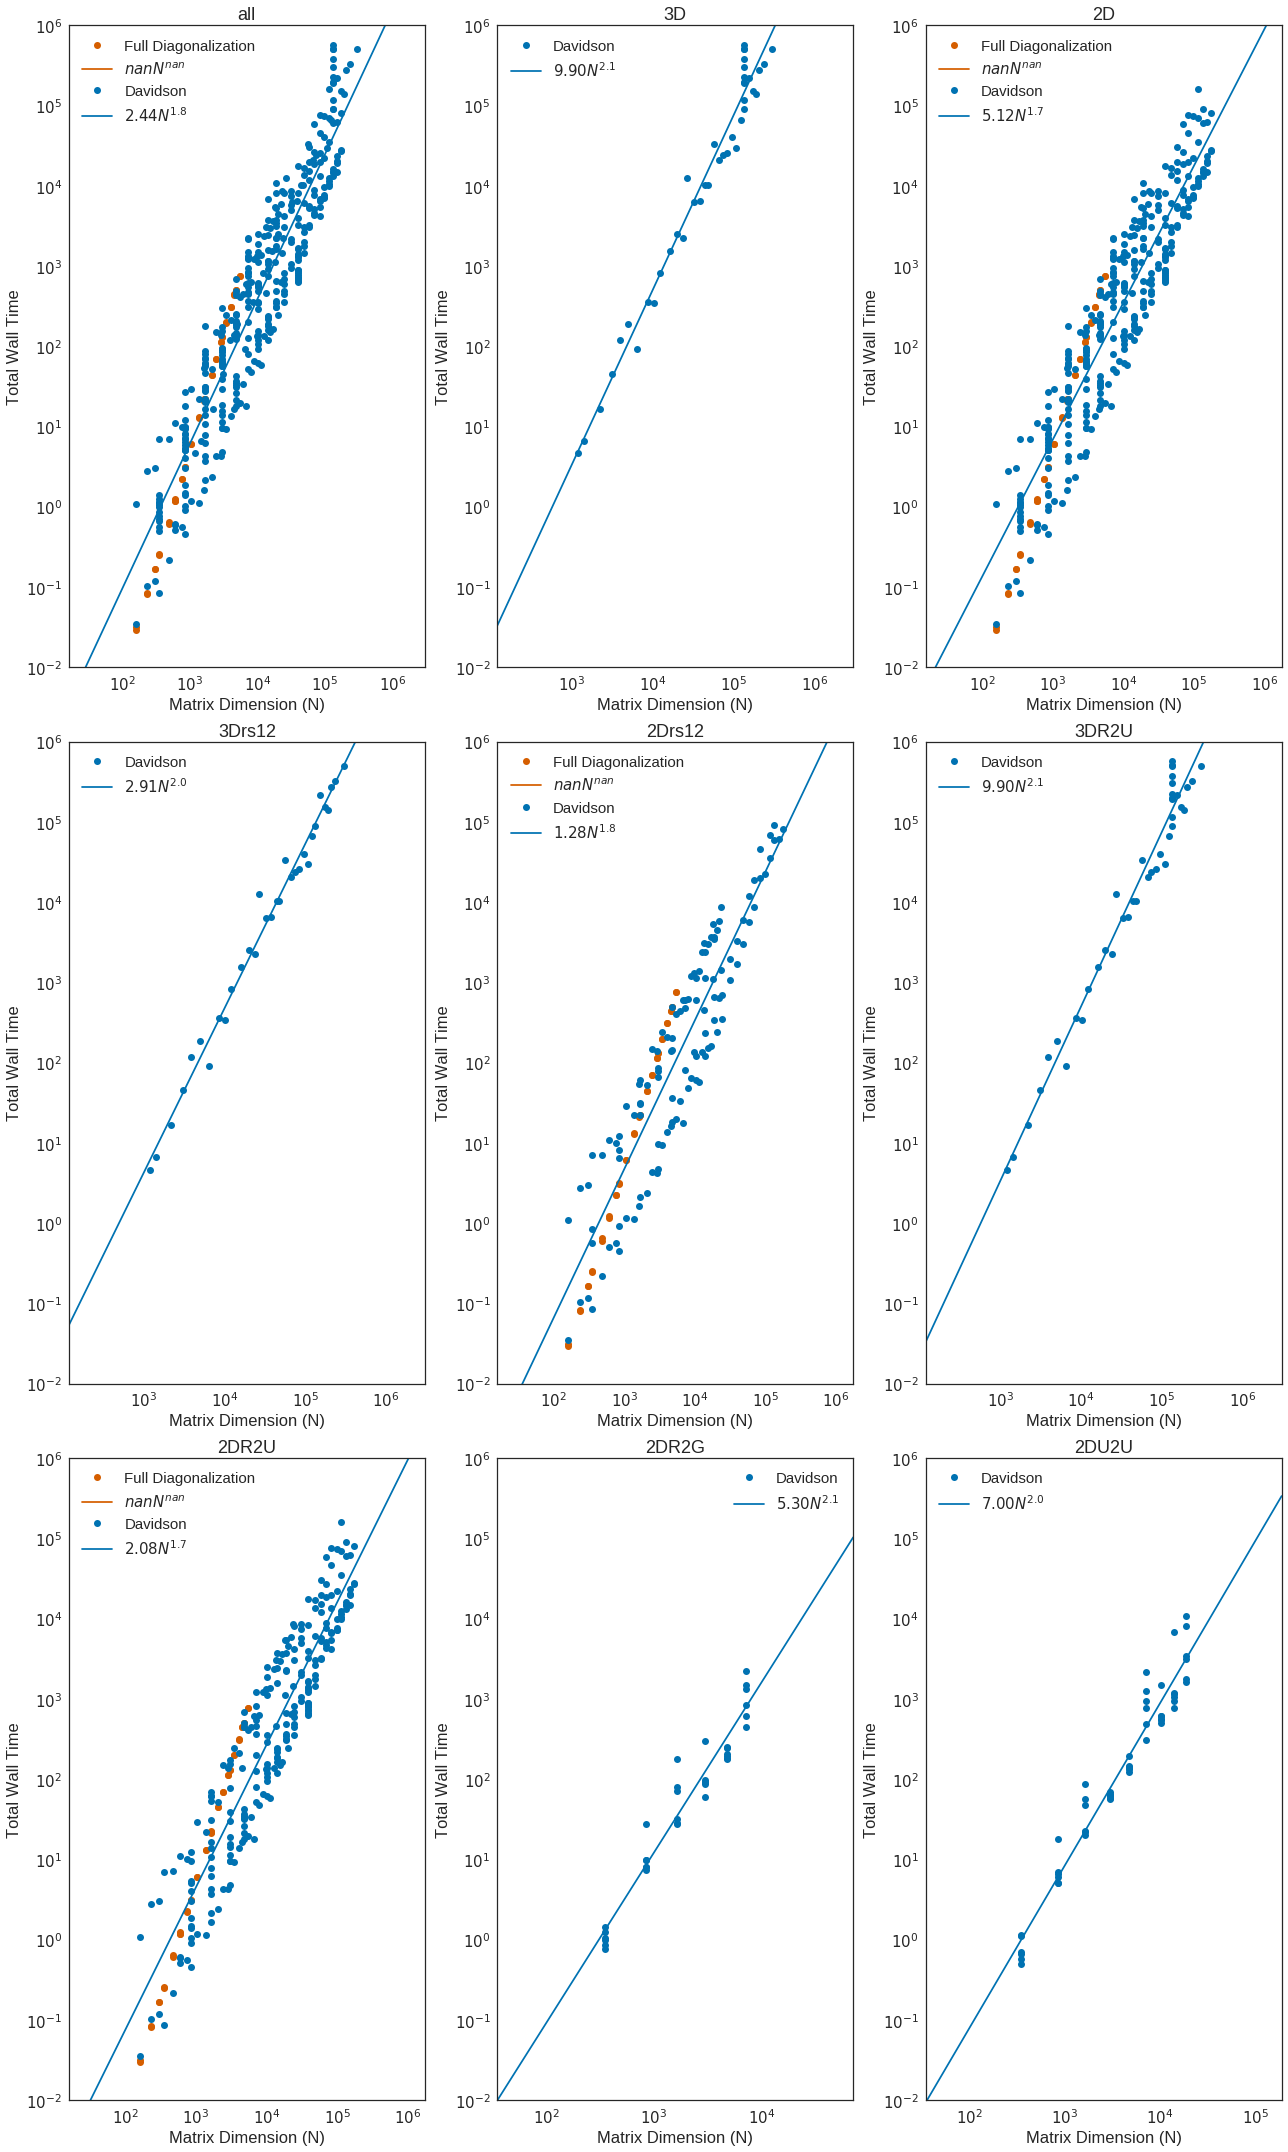

In [6]:
fig = plt.figure(figsize=(18, 30))
HFSA.subplotByDfDict(data, fig, HFSA.plot_diag_scaling)
plt.tight_layout()
plt.show()

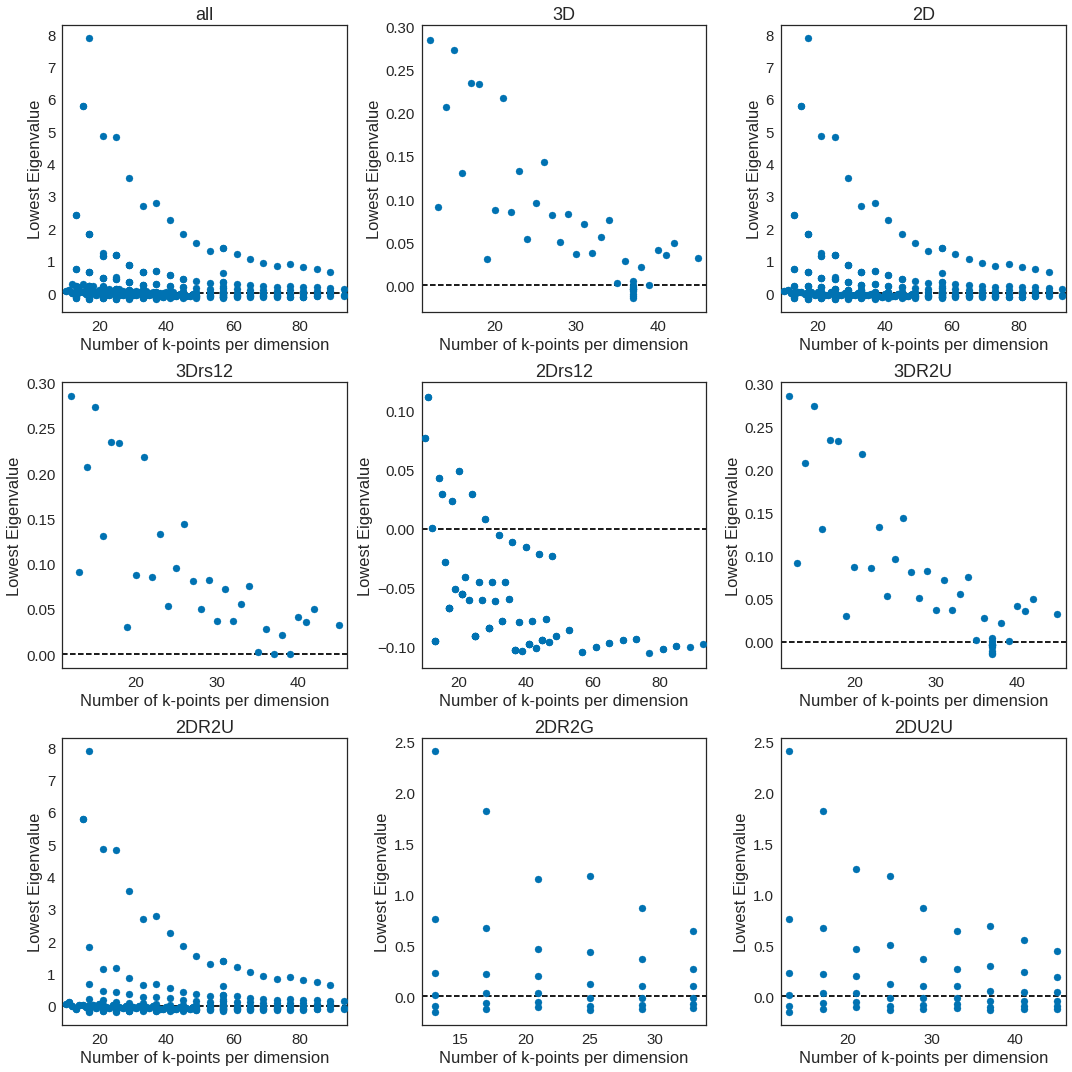

In [7]:
fig = plt.figure(figsize=(15, 15))
HFSA.subplotByDfDict(data, fig, HFSA.plot_dav_vs_full)
plt.tight_layout()
plt.show()

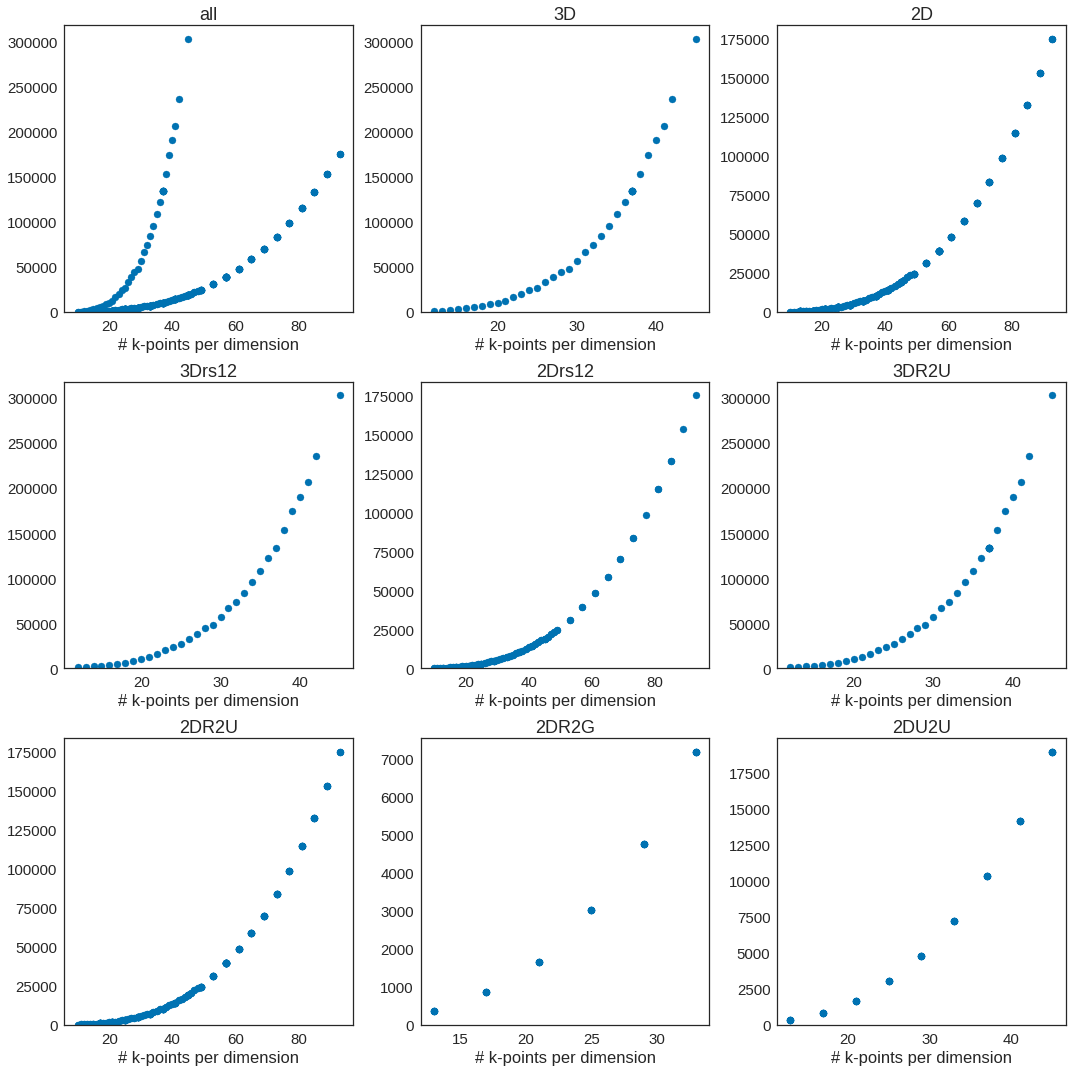

In [8]:
fig = plt.figure(figsize=(15,15))
HFSA.subplotByDfDict(data, fig, HFSA.plot_matrix_scaling)
plt.tight_layout()
plt.show()

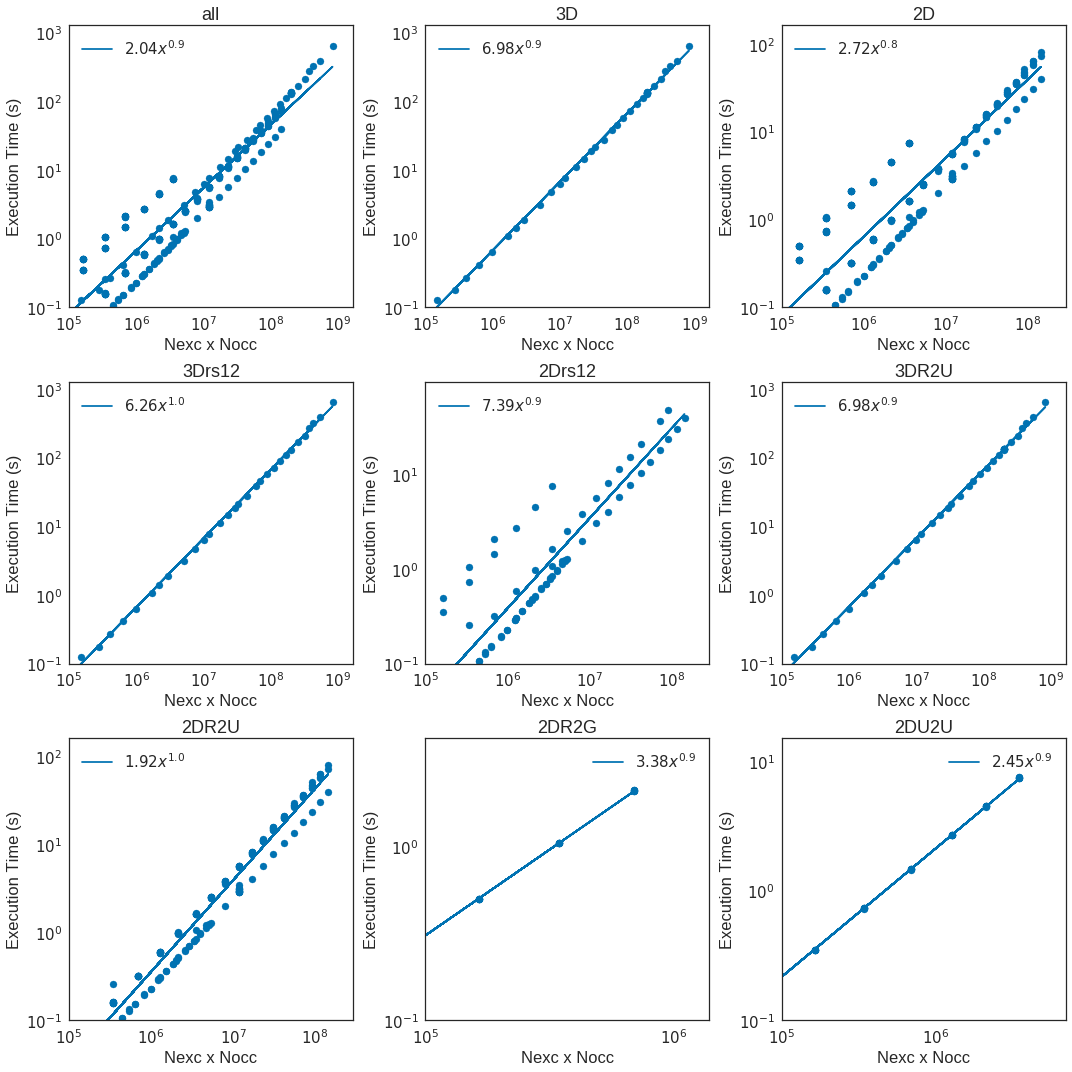

In [9]:
fig = plt.figure(figsize=(15, 15))
HFSA.subplotByDfDict(data, fig, HFSA.plot_mvproduct_scaling)
plt.tight_layout()
plt.show()

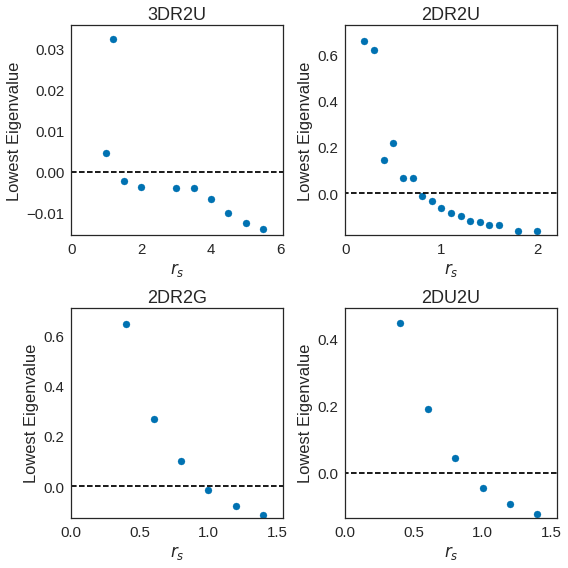

In [10]:
fig = plt.figure(figsize=(8, 8))

subview = dict_subview(data, ['2DR2U', '2DU2U', '2DR2G', '3DR2U'])
new_data = {key : HFSA.only_max(df, 'Nk', 'rs') for (key, df) in subview.items()}

HFSA.subplotByDfDict(new_data, fig, HFSA.plot_stability)
plt.tight_layout()
plt.show()

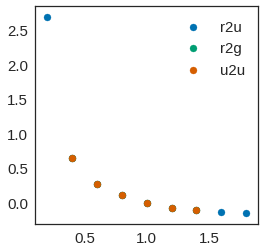

In [11]:
r2u = data['2DR2U'][data['2DR2U']['Nk'] == 33].sort_values(by='rs')
r2g = data['2DR2G'][data['2DR2G']['Nk'] == 33].sort_values(by='rs')
u2u = data['2DU2U'][data['2DU2U']['Nk'] == 33].sort_values(by='rs')

fig = plt.figure(figsize=(4, 4))
plt.scatter(r2u['rs'], r2u['dav_min_eval'], label='r2u')
plt.scatter(r2g['rs'], r2g['dav_min_eval'], label='r2g')
plt.scatter(u2u['rs'], u2u['dav_min_eval'], label='u2u')
plt.legend()
plt.show()